In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Uber cab/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df['price'].value_counts()

7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 147, dtype: int64

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
pd.DataFrame(pd.unique(df['name']),columns = ["Name of Ride"])

,Name of Ride
0,Shared
1,Lux
2,Lyft
3,Lux Black XL
4,Lyft XL
5,Lux Black
6,UberXL
7,Black
8,UberX
9,WAV


In [ ]:
pd.DataFrame(pd.unique(df['cab_type']),columns = ['Type of cab companies'])

,Type of cab companies
0,Lyft
1,Uber


In [ ]:
pd.DataFrame(df.groupby(['cab_type','name'])['price'].sum())

price
cab_type name                    
Lyft     Lux            910509.50
         Lux Black     1181605.55
         Lux Black XL  1656124.55
         Lyft           492413.68
         Lyft XL        784375.20
         Shared         308929.50
Uber     Black         1130758.00
         Black SUV     1668679.50
         Taxi                0.00
         UberPool       482184.00
         UberX          537997.00
         UberXL         863803.00
         WAV            538013.50

In [ ]:
pd.DataFrame(df.groupby(['cab_type','distance'])['price'].sum())

price
cab_type distance         
Lyft     0.39       3281.0
         0.40       1853.0
         0.41         74.5
         0.42       3208.5
         0.43      12237.5
...                    ...
Uber     7.45        156.0
         7.46      36955.5
         7.50        512.5
         7.62        169.5
         7.86        167.0

[935 rows x 1 columns]

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
dict={'distane':[df['distance'].min(),df['distance'].max()],
                  'price':[df['price'].min(),df['price'].max()],
                  'datetime':[df['datetime'].min(),df['datetime'].max()]}

pd.DataFrame(dict,index = ['minimum','maximum'])

,distane,price,datetime
minimum,0.02,2.5,2018-11-26 03:40:46
maximum,7.86,97.5,2018-12-18 19:15:10


In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
pd.DataFrame(df.groupby(['source','destination','cab_type','name','distance'])['price'].sum())

price
source   destination       cab_type name distance        
Back Bay Boston University Lyft     Lux  1.43        90.0
                                         1.44       834.0
                                         1.45      1429.5
                                         1.46      1642.0
                                         1.47      1411.5
...                                                   ...
West End South Station     Uber     WAV  1.85         9.5
                                         2.14      4926.5
                                         2.15         7.5
                                         2.16         8.5
                                         3.51        29.5

[25894 rows x 1 columns]

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
dicts = {'source':[df['source'].min(),df['source'].max],
        'destination':[df['destination'].min(),df['destination'].max()],
        'distance':[df['distance'].min(),df['distance'].max()],
        'price ': [df['price'].min(),df['price'].max()]}

In [ ]:
pd.DataFrame(dicts,index = ['min','max'])

,source,destination,distance,price
min,Back Bay,Back Bay,0.02,2.5
max,<bound method NDFrame._add_numeric_operations....,West End,7.86,97.5


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
data1=pd.DataFrame(df[['source','destination','cab_type','name','distance']])
data1

,source,destination,cab_type,name,distance
0,Haymarket Square,North Station,Lyft,Shared,0.44
1,Haymarket Square,North Station,Lyft,Lux,0.44
2,Haymarket Square,North Station,Lyft,Lyft,0.44
3,Haymarket Square,North Station,Lyft,Lux Black XL,0.44
4,Haymarket Square,North Station,Lyft,Lyft XL,0.44
...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,1.00
693067,West End,North End,Uber,UberX,1.00
693068,West End,North End,Uber,Taxi,1.00
693069,West End,North End,Uber,Black SUV,1.00


# Predicting the price

<ipython-input-41-4fe25ce02e30>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_corr=df[temp].corr()


,timestamp,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
timestamp,1.000000,-0.248748,-0.226264,-0.228125,-0.366859,-0.215363,-0.401999,-0.306971,0.999332,-0.186328,-0.378346,-0.157748,0.999364,0.998194,0.999290,0.998286,0.999276,0.000808
temperature,-0.248748,1.000000,0.946166,0.788706,0.502326,0.710552,0.382977,0.789261,-0.257169,0.780546,0.817521,0.703208,-0.254467,-0.242698,-0.253881,-0.231513,-0.255288,-0.000084
apparentTemperature,-0.226264,0.946166,1.000000,0.821653,0.574061,0.811792,0.495935,0.697441,-0.233117,0.792625,0.786577,0.782396,-0.231309,-0.224744,-0.227712,-0.212453,-0.228674,-0.000193
temperatureHigh,-0.228125,0.788706,0.821653,1.000000,0.611657,0.958746,0.534880,0.794548,-0.231243,0.986001,0.877466,0.951057,-0.228204,-0.214214,-0.225931,-0.205708,-0.226911,-0.000516
temperatureLow,-0.366859,0.502326,0.574061,0.611657,1.000000,0.629332,0.933953,0.473264,-0.365975,0.567568,0.636362,0.579424,-0.369013,-0.383542,-0.360320,-0.367590,-0.361987,0.000182
apparentTemperatureHigh,-0.215363,0.710552,0.811792,0.958746,0.629332,1.000000,0.602236,0.665066,-0.218218,0.926454,0.791976,0.974289,-0.215608,-0.206671,-0.211503,-0.197581,-0.212064,-0.000261
apparentTemperatureLow,-0.401999,0.382977,0.495935,0.534880,0.933953,0.602236,1.000000,0.284451,-0.400355,0.492281,0.479460,0.558193,-0.403192,-0.416424,-0.394981,-0.404296,-0.396409,0.000831
temperatureMin,-0.306971,0.789261,0.697441,0.794548,0.473264,0.665066,0.284451,1.000000,-0.309750,0.782945,0.953854,0.648381,-0.307080,-0.294607,-0.306577,-0.278444,-0.308665,-0.000428
temperatureHighTime,0.999332,-0.257169,-0.233117,-0.231243,-0.365975,-0.218218,-0.400355,-0.309750,1.000000,-0.188793,-0.381387,-0.159726,0.999909,0.998486,0.999885,0.998537,0.999885,0.000759
temperatureMax,-0.186328,0.780546,0.792625,0.986001,0.567568,0.926454,0.492281,0.782945,-0.188793,1.000000,0.838358,0.956358,-0.185383,-0.168071,-0.185512,-0.162140,-0.186660,-0.000550


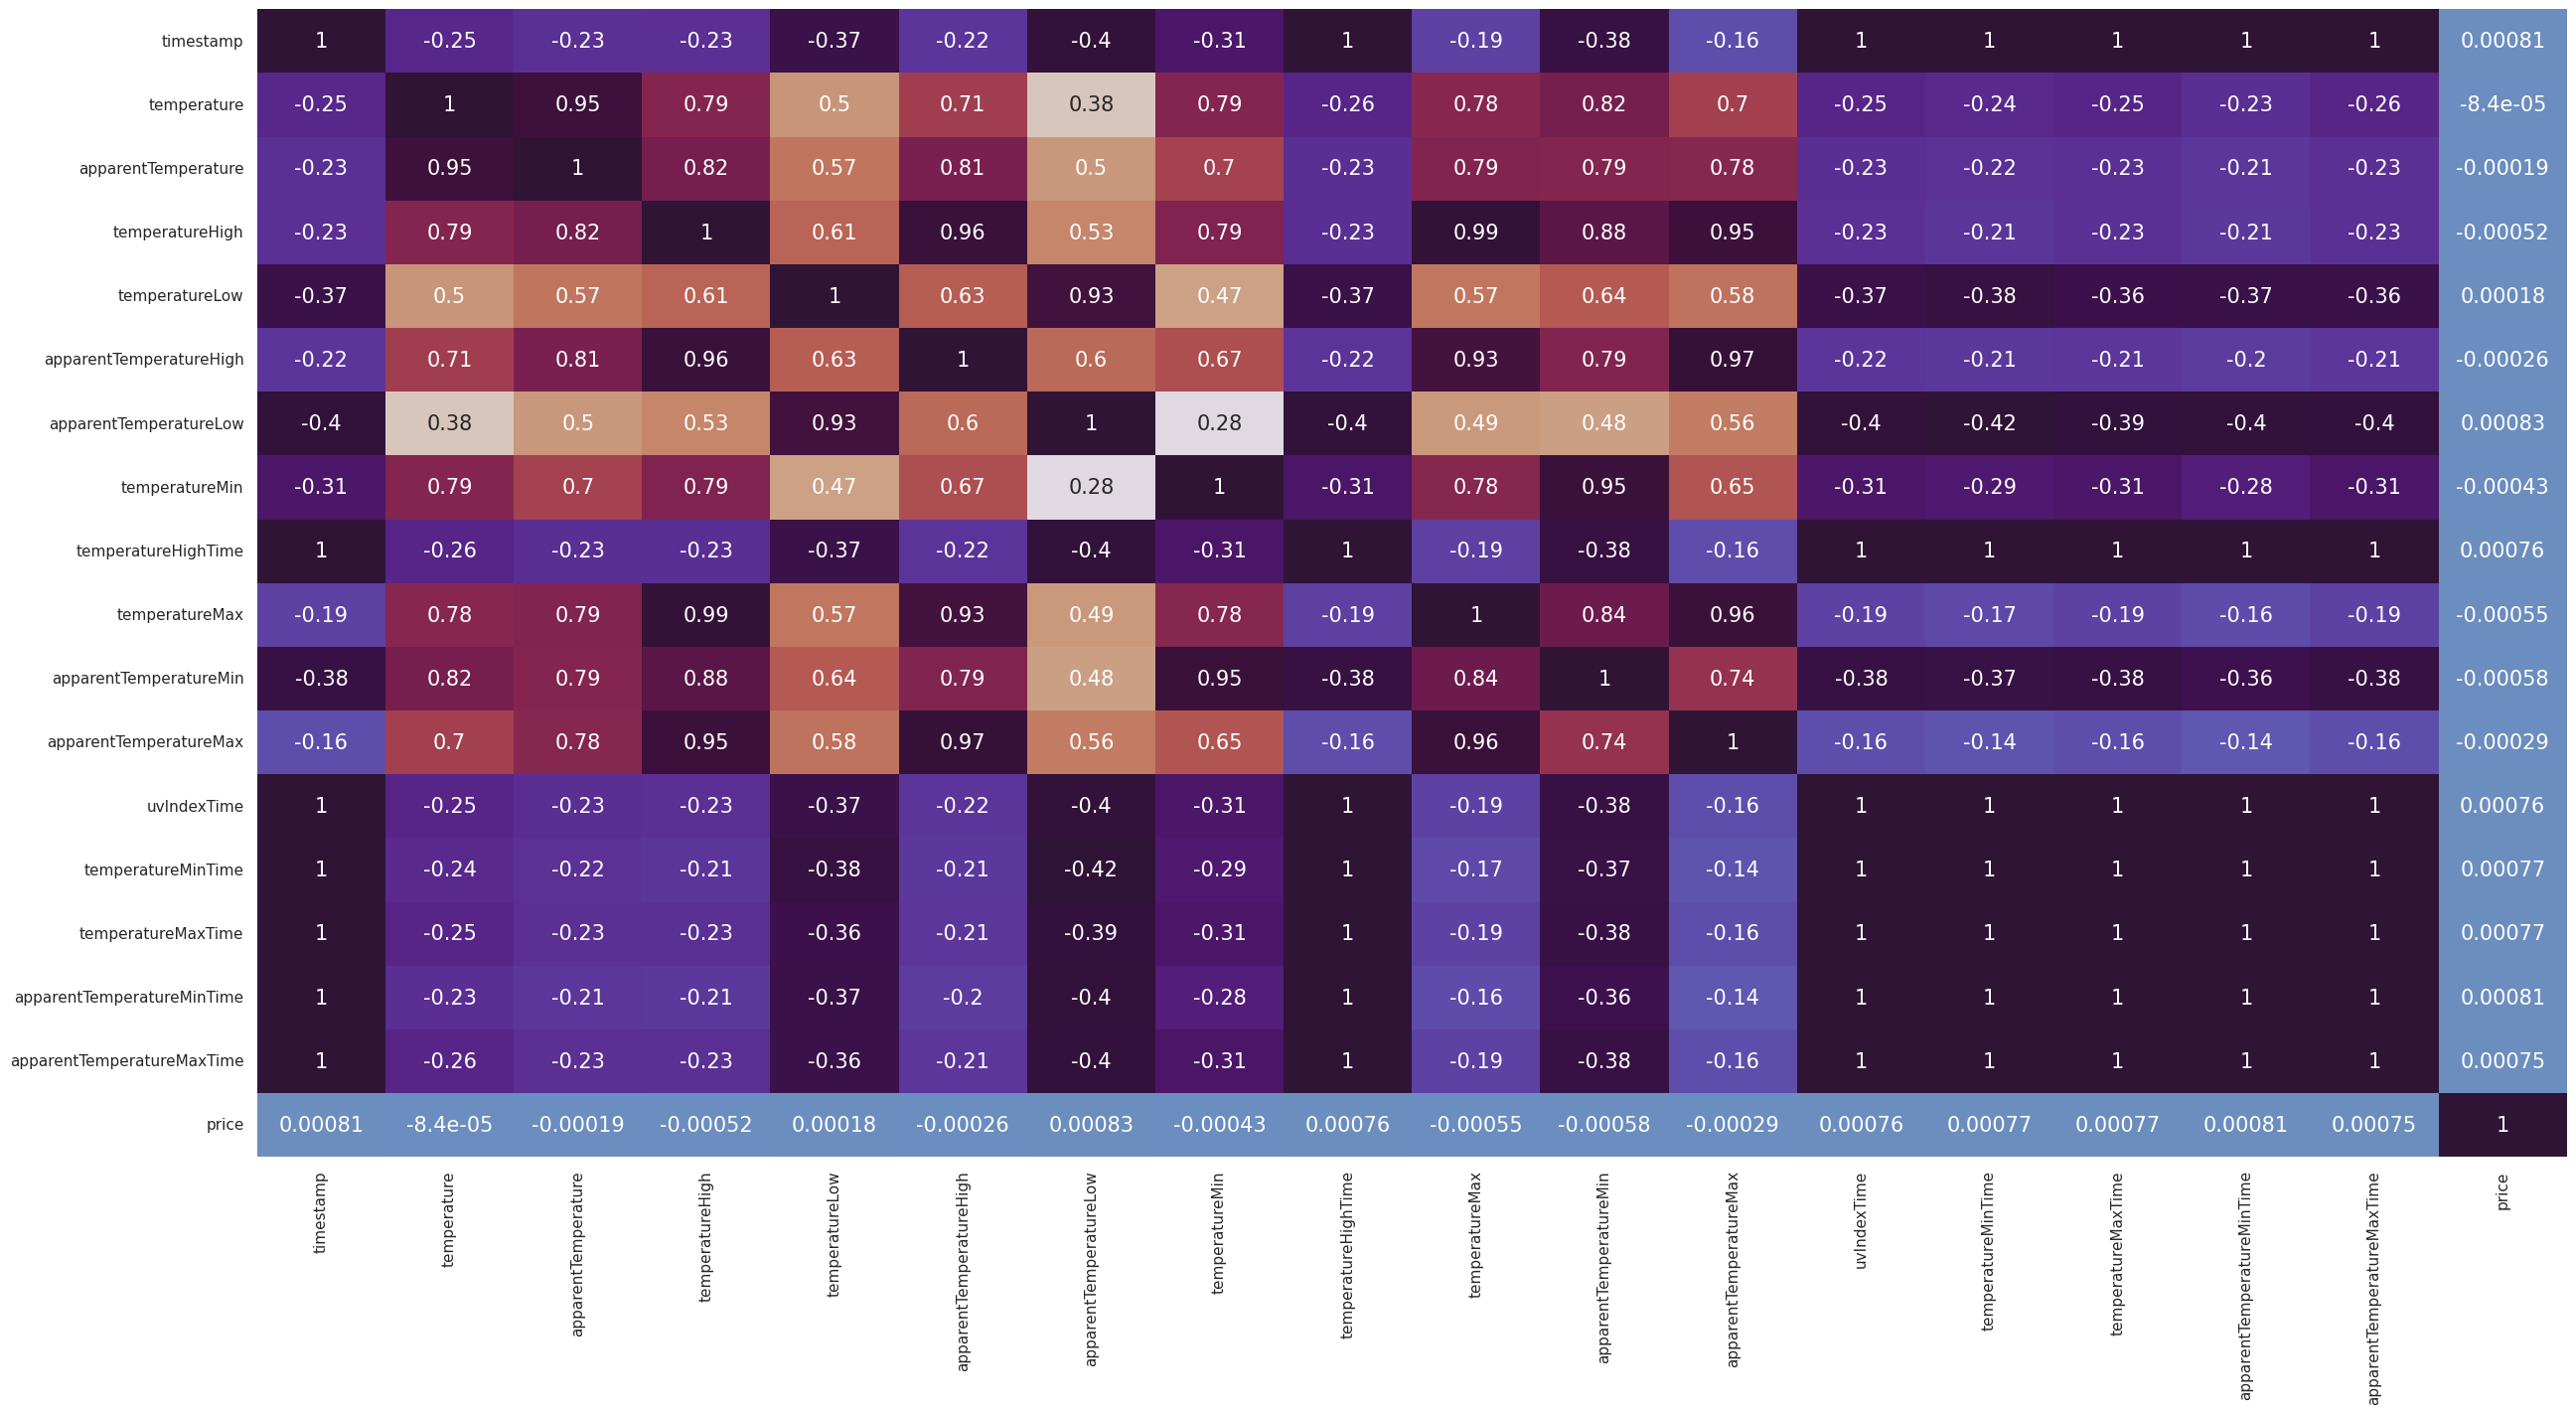

In [ ]:
temp=['timestamp','datetime','long_summary','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
             'uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000


,hour,day,month,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,price
hour,1.000000,0.066090,-0.079379,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,0.000561
day,0.066090,1.000000,-0.861306,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.000722
month,-0.079379,-0.861306,1.000000,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.000913
pressure,-0.067366,-0.444635,0.589609,1.000000,-0.280380,-0.285501,0.004267,0.227912,-0.451178,0.533037,0.532998,-0.528024,-0.243383,0.000866
windBearing,0.036089,0.092167,-0.135103,-0.280380,1.000000,-0.221602,0.114206,0.401978,0.346117,-0.133016,-0.133027,0.262817,-0.555013,-0.001382
cloudCover,0.026525,-0.041190,-0.016800,-0.285501,-0.221602,1.000000,-0.066898,-0.477618,0.042311,-0.080584,-0.080560,0.093997,0.396136,0.000883
uvIndex,0.330209,-0.011885,-0.012321,0.004267,0.114206,-0.066898,1.000000,0.119842,-0.016625,-0.023806,-0.023808,0.055534,-0.040818,-0.000424
visibility.1,0.174129,0.104992,0.011493,0.227912,0.401978,-0.477618,0.119842,1.000000,0.263140,0.152877,0.152864,-0.173903,-0.545052,0.001497
ozone,0.034164,0.377057,-0.149333,-0.451178,0.346117,0.042311,-0.016625,0.263140,1.000000,0.194382,0.194421,-0.229931,-0.223173,0.000460
sunriseTime,-0.027537,-0.341068,0.770684,0.533037,-0.133016,-0.080584,-0.023806,0.152877,0.194382,1.000000,1.000000,-0.844637,-0.210650,0.000760


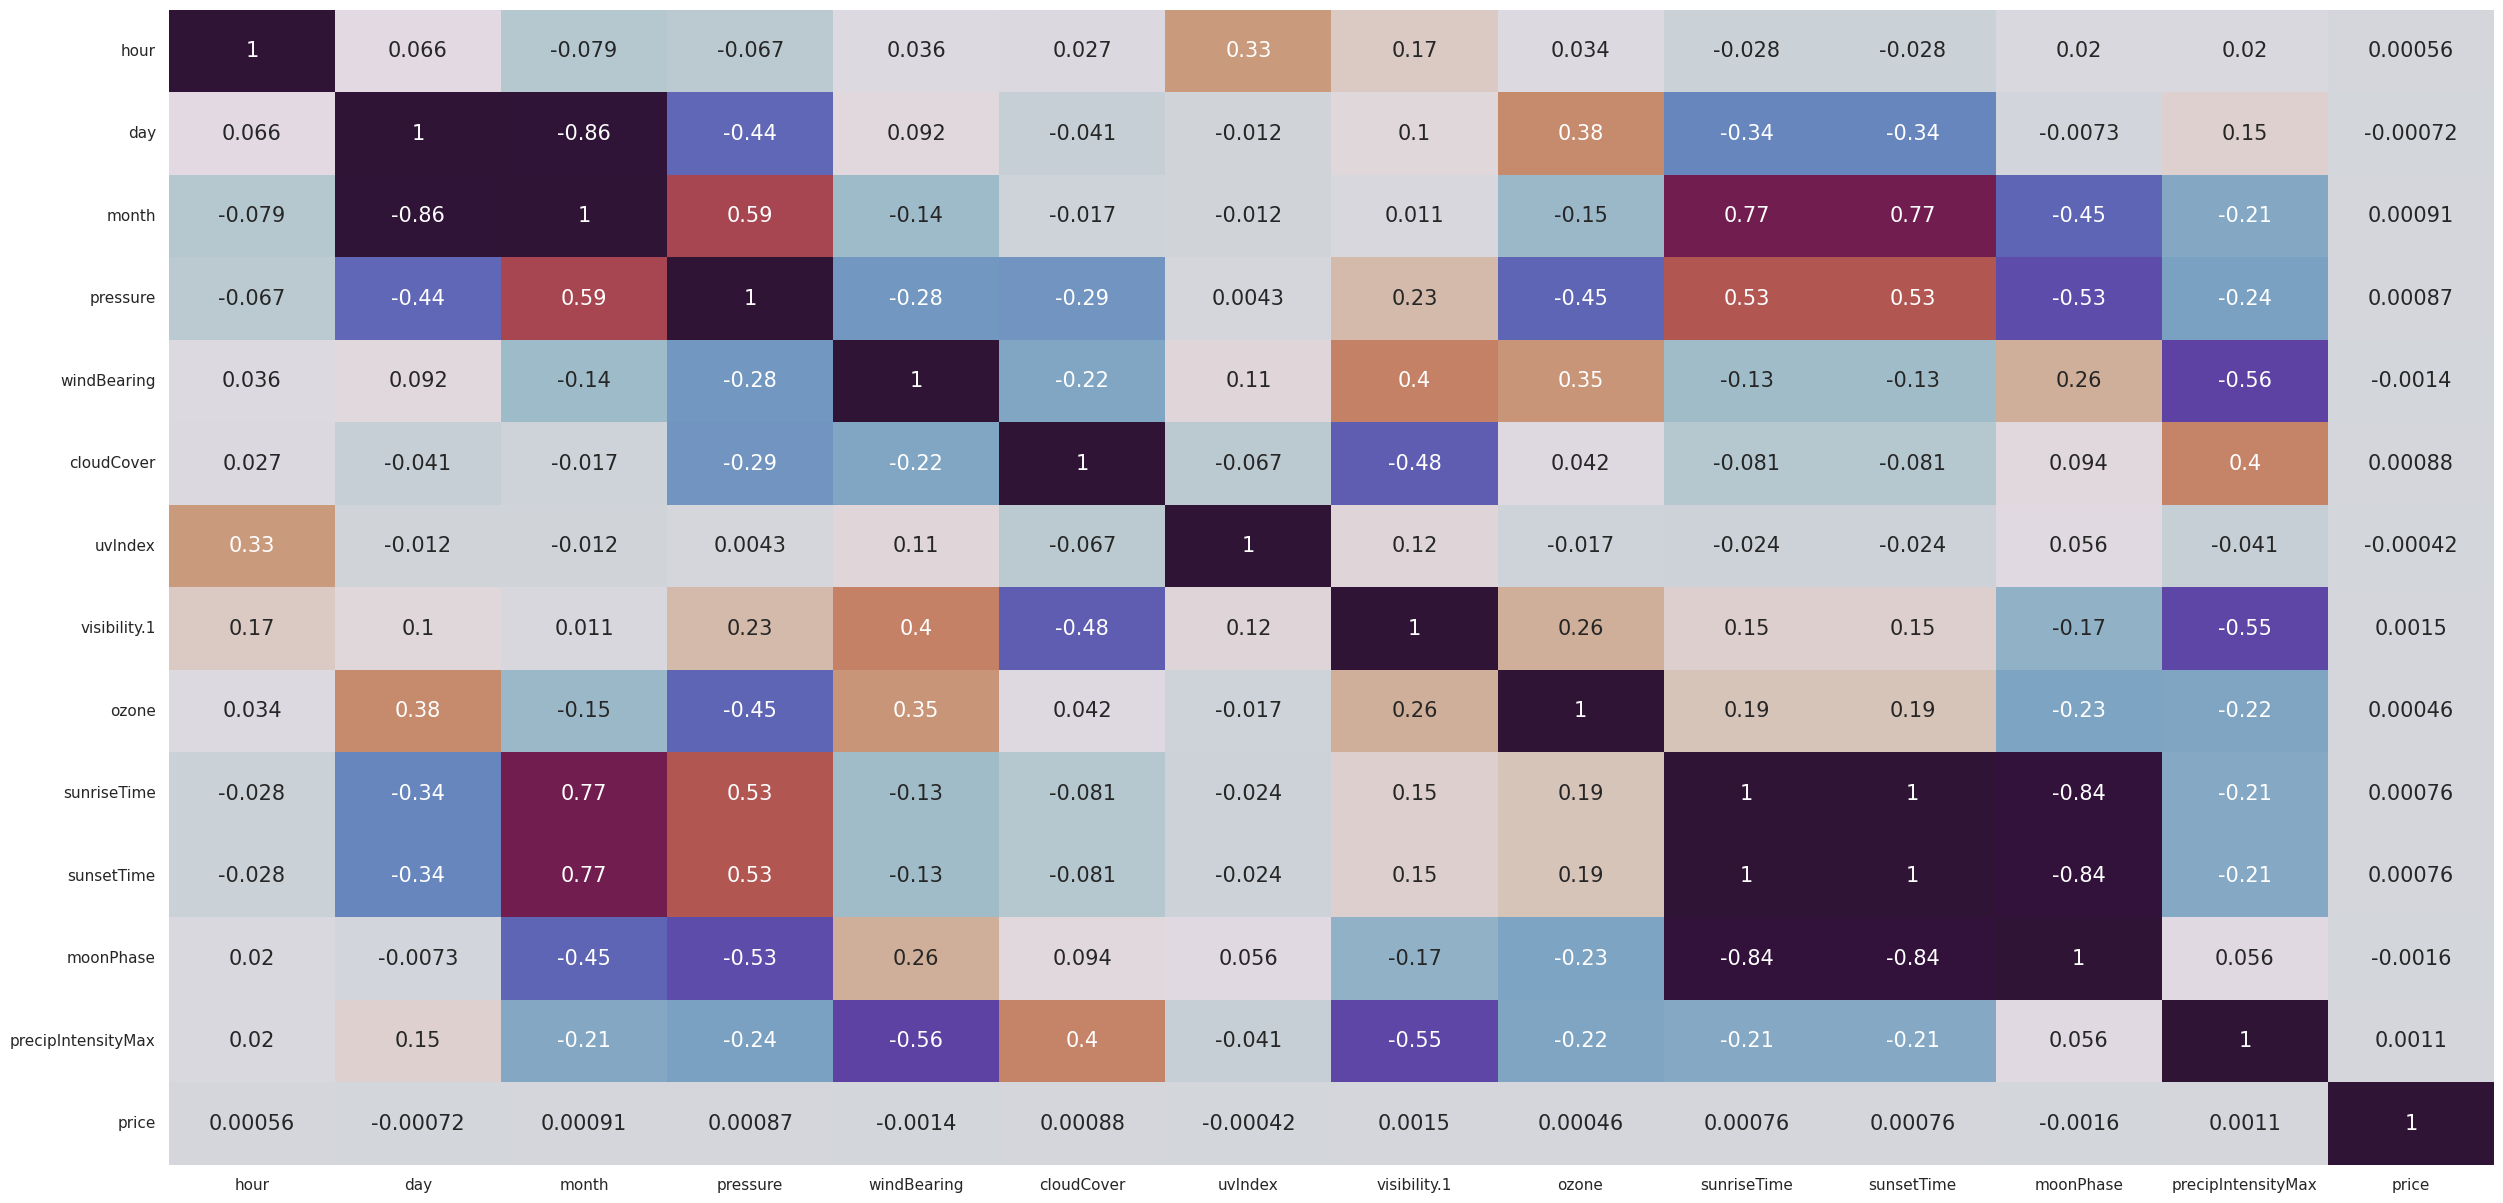

In [ ]:
temp=['hour','day','month','pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,...,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,dewPoint
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,...,0.68,8.66,9.17,1545015600,10.000,1545048000,1544968800,1545044400,partly-cloudy-night,32.70
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,...,0.94,11.98,11.98,1543291200,4.786,1543298400,1543251600,1543291200,rain,41.83
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,...,0.75,7.33,7.33,1543334400,10.000,1543402800,1543320000,1543392000,clear-night,31.10
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,...,0.73,5.28,5.28,1543514400,10.000,1543579200,1543510800,1543575600,clear-night,26.64
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,...,0.70,9.14,9.14,1543446000,10.000,1543478400,1543420800,1543460400,partly-cloudy-night,28.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,...,0.74,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65


,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,dewPoint,latitude,price
humidity,1.000000,-0.207223,-0.306439,-0.159006,-0.697820,-0.164756,-0.162622,-0.161642,0.747336,-0.117481,-0.001238
windSpeed,-0.207223,1.000000,0.937638,-0.070913,-0.035520,-0.060080,-0.072762,-0.064934,-0.075004,-0.097139,0.000990
windGust,-0.306439,0.937638,1.000000,0.000497,0.038831,0.012889,0.000975,0.007643,-0.175517,0.024309,0.001218
windGustTime,-0.159006,-0.070913,0.000497,1.000000,0.152486,0.998968,0.999163,0.999034,-0.259949,0.172625,0.000851
visibility,-0.697820,-0.035520,0.038831,0.152486,1.000000,0.152967,0.155511,0.151688,-0.579915,0.124166,0.001497
temperatureLowTime,-0.164756,-0.060080,0.012889,0.998968,0.152967,1.000000,0.999684,0.999961,-0.267695,0.171193,0.000754
apparentTemperatureHighTime,-0.162622,-0.072762,0.000975,0.999163,0.155511,0.999684,1.000000,0.999710,-0.269586,0.173299,0.000741
apparentTemperatureLowTime,-0.161642,-0.064934,0.007643,0.999034,0.151688,0.999961,0.999710,1.000000,-0.265453,0.172571,0.000761
dewPoint,0.747336,-0.075004,-0.175517,-0.259949,-0.579915,-0.267695,-0.269586,-0.265453,1.000000,-0.130234,-0.000615
latitude,-0.117481,-0.097139,0.024309,0.172625,0.124166,0.171193,0.173299,0.172571,-0.130234,1.000000,0.002088


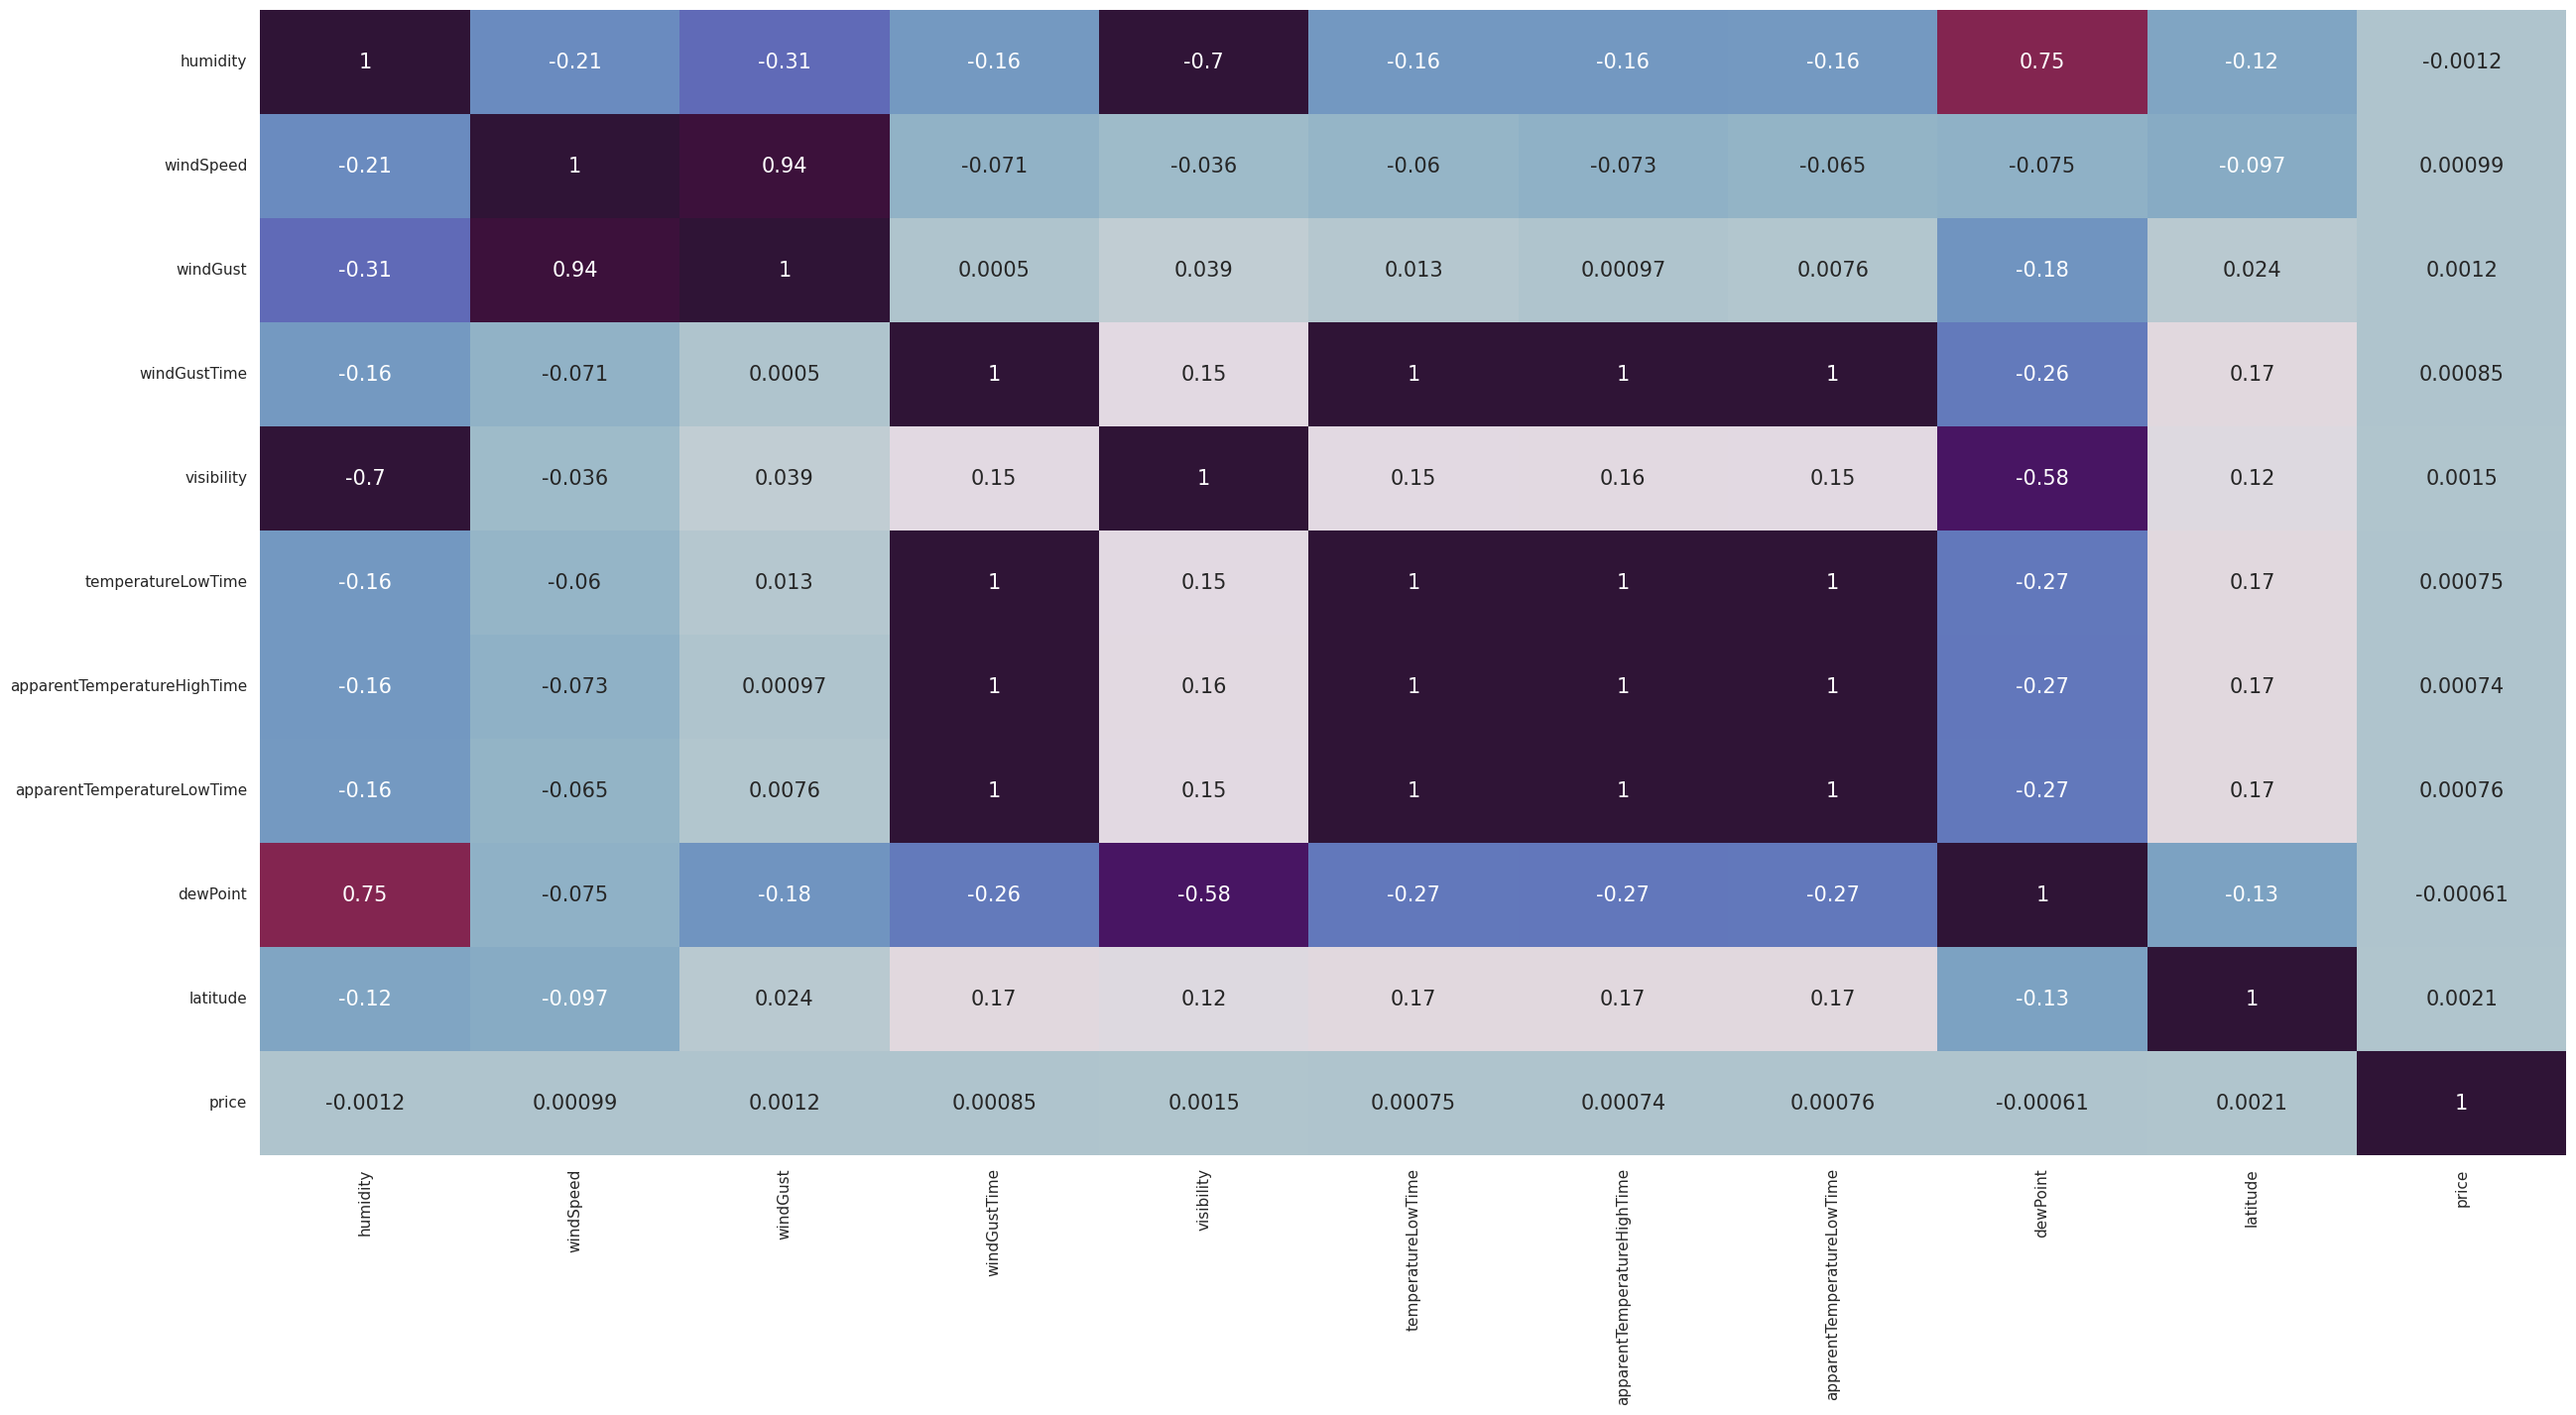

In [ ]:
temp=['humidity','windSpeed','windGust','windGustTime','visibility','temperatureLowTime','apparentTemperatureHighTime',
      'apparentTemperatureLowTime','dewPoint','latitude','price']
plt.figure(figsize=(30,15))
temp_corr=df[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,longitude,short_summary,precipIntensity,precipProbability,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,-71.0330,Mostly Cloudy,0.0000,0.0,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,-71.0330,Rain,0.1299,1.0,rain
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,-71.0330,Partly Cloudy,0.0000,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night


,precipIntensity,precipProbability,longitude,price
precipIntensity,1.000000,0.838470,0.130840,0.000166
precipProbability,0.838470,1.000000,0.122355,-0.000243
longitude,0.130840,0.122355,1.000000,-0.001417
price,0.000166,-0.000243,-0.001417,1.000000


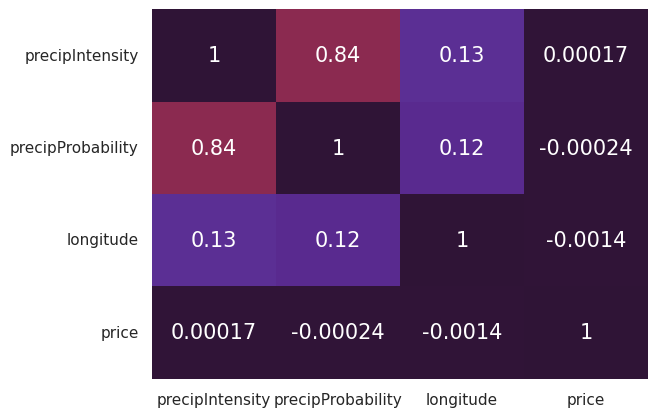

In [ ]:
temp=['precipIntensity','precipProbability','longitude','price']
sns.heatmap(df[temp].corr(),annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
df[temp].corr()

In [ ]:
for col in temp:
    if col=='price':
        continue
    df.drop(col,axis=1,inplace=True)
df

,id,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.00,1.0,Partly Cloudy,partly-cloudy-night
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night


In [ ]:
feature=['distance','surge_multiplier','name','cab_type']

# Building the model

In [ ]:
X=df[feature]
y=df['price']
key=X.keys()

In [ ]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [ ]:
y.isna().sum()

55095

In [ ]:
y = y.fillna(0)

In [ ]:
y.isna().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
str_col=['cab_type','name']
label = LabelEncoder()
for col in str_col:
    X[col]=label.fit_transform(X[col])
X

<ipython-input-56-8e8100a8db38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=label.fit_transform(X[col])
<ipython-input-56-8e8100a8db38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=label.fit_transform(X[col])


,distance,surge_multiplier,name,cab_type
0,0.44,1.0,7,0
1,0.44,1.0,2,0
2,0.44,1.0,5,0
3,0.44,1.0,4,0
4,0.44,1.0,6,0
...,...,...,...,...
693066,1.00,1.0,11,1
693067,1.00,1.0,10,1
693068,1.00,1.0,8,1
693069,1.00,1.0,1,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
SelectedParameters = {'max_depth':[5,10,15,20,25]}
GridSearchModel = GridSearchCV(RandomForestRegressorModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X, y)
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.9720262951753063
Best Parameters are : {'max_depth': 15}
Best Estimator is : RandomForestRegressor(max_depth=15, random_state=33)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (589110, 4)
X_test shape is  (103961, 4)
y_train shape is  (589110,)
y_test shape is  (103961,)


In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=33)
RandomForestRegressorModel.fit(X_train,y_train)
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9737990295758208
Random Forest Regressor Test Score is :  0.972578397827891


In [ ]:
y_pred = RandomForestRegressorModel.predict(X_test)
y_pred

array([ 4.00700826, 34.00927349,  0.        , ..., 13.50227225,
        6.84246202,  7.13108185])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [ ]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  1.0381222214383192
Mean Squared Error Value is :  2.745485371789363
Median Absolute Error Value is :  0.7151549360247742


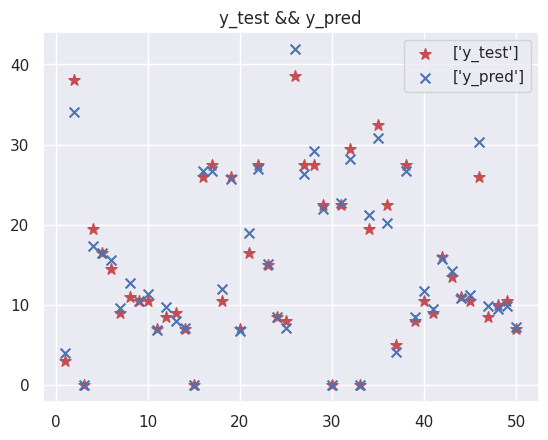

In [ ]:
plt.title('y_test && y_pred')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_pred[:50],marker='x',c='b',s=50,label=['y_pred'])
plt.legend()